**Developers' Guide:** [Amazon Machine Learning](https://docs.aws.amazon.com/pdfs/machine-learning/latest/dg/machinelearning-dg.pdf#cross-validation)

#### **Task:**  


### **Dataset available on:**

### **Imports**

In [1]:
import numpy as np # scientific computing for multidimensional array
import pandas as pd # wrangling and enchancing numpy
import scipy # scientific python
import statsmodels.api as sm # statistical analysis
import matplotlib.pyplot as plt # visualization
import seaborn as sns # advanced statistical visuaization
sns.set() # over write the graphics of all the matplotlib plot
import sklearn # machine learn
%matplotlib inline

#### **Read the csv file and study the database**

In [2]:
# read the data using pandas
realEstate_df = pd.read_csv('/content/real_estate_price_size_year.csv')

#### **Basic EDA**

In [3]:
# display the first five rows using the head function
realEstate_df.head(5)

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


**Note:**  we have generated a random variable and add to the dataFrame.

In [4]:
# shape of the data
realEstate_df.shape

(100, 3)

In [5]:
# check for missing values
realEstate_df.isnull().sum()

price    0
size     0
year     0
dtype: int64

In [6]:
# check data types
realEstate_df.dtypes

price    float64
size     float64
year       int64
dtype: object

In [7]:
# describe stats with .describe() method
realEstate_df.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


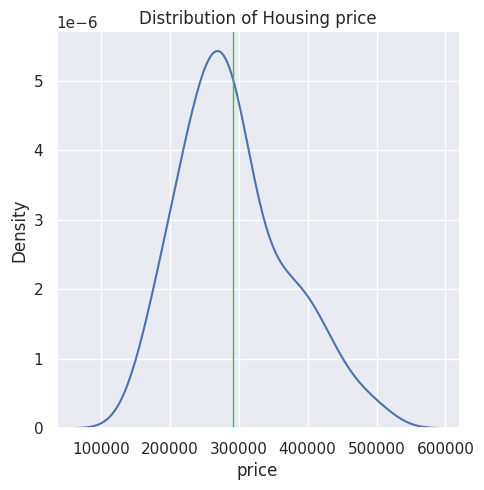

In [8]:
# plot the distribution
sns.set_theme()
sns.displot(x=realEstate_df['price'], kind="kde").set(title="Distribution of Housing price")
plt.axvline(x=realEstate_df['price'].mean(), linewidth=1, color='g');

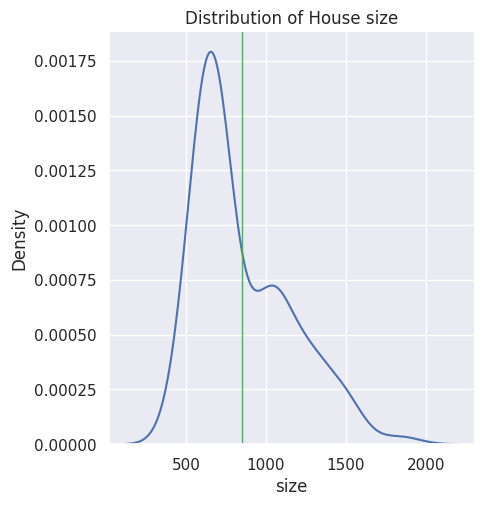

In [9]:
# plot the distribution
sns.set_theme()
sns.displot(x=realEstate_df['size'], kind="kde").set(title="Distribution of House size")
plt.axvline(x=realEstate_df['size'].mean(), linewidth=1, color='g');

### **Regression model:**

#### **Define the target and the inputs**

In [10]:
target= realEstate_df['price'] # input
input = realEstate_df[['size',	'year']] # target

#### **plot the regression line using seaborn kind="reg" data:**

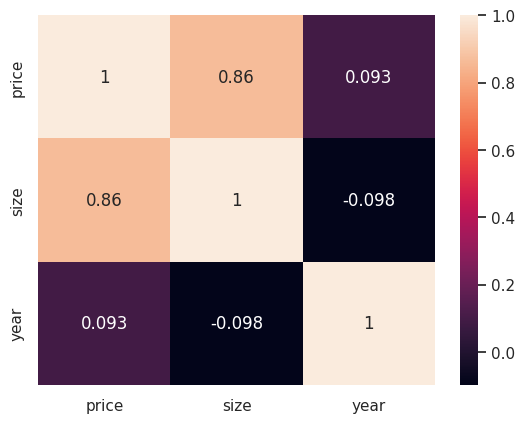

In [11]:
sns.heatmap(realEstate_df.corr(), annot=True);

**Model:**

In [12]:
x = sm.add_constant(input) # statsmodels add a constant or the intercept value
results = sm.OLS(target,x).fit() # fit ordinary least square method x and y/target

In [13]:
# display a summary result of the model using the .summary method
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           2.77e-32
Time:                        11:29:50   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **Now let's drop drop the year:**

In [14]:
target= realEstate_df['price'] # input
input = realEstate_df[['size']] # target

In [15]:
x = sm.add_constant(input) # statsmodels add a constant or the intercept value
results = sm.OLS(target,x).fit() # fit ordinary least square method x and y/target

In [16]:
# display a summary result of the model using the .summary method
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           8.13e-31
Time:                        11:29:50   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note:** when we drop year the model's perfomance drop significantly indicating that the year column is statistical significant and in our first analysis it has a p-value less than 5%.

## **Now over to you use the code above to find cause and effect on a dataset you like Good Luck!!**